In [1]:
import mysql.connector
import pandas as pd

Note: Enter Shift+Enter to execute a cell

In [2]:
user_name = input('Enter user name: ')
user_password = input('Enter password: ')

Enter user name: root
Enter password: prasanna


### Connect to Database

In [3]:
mydb = mysql.connector.connect(
    host="127.0.0.1", port = 3306,
    user=user_name,
    password=user_password,
    db = 'mydb',
    auth_plugin='mysql_native_password'
)

cursor = mydb.cursor()

### Read list of all users in the social networking site

In [4]:
df = pd.read_sql_query("SELECT * FROM User",mydb)

In [5]:
print('List of users:')
for fn, ln in zip(df.FirstName, df.LastName):
    print('- ' + fn + ' ' + ln)

List of users:
- Jake Paul
- Melissa Vandela
- Mike Loga
- Jynx Pent
- Paula Abraham
- Etha Hunt
- Tom Cruise
- Jennifer Peralta
- Clint Dempsey
- Paul Wood


### Insert records in User table, Call addAgeStatus function

In [20]:
df = pd.read_sql_query("SELECT * FROM User",mydb)
df

,User_ID,FirstName,LastName,Bio,Age,Mobile,AgeStatus,Created_at,Updated_at,DOB
0,1,Jake,Paul,Student,24,2395328458,major,2003-10-23,2017-12-25,1993-02-13
1,2,Melissa,Vandela,Singer,26,9328745983,major,2005-10-15,2018-11-20,1996-03-22
2,3,Mike,Loga,Driver,29,8457867435,major,2007-01-23,2017-11-12,1998-07-01
3,4,Jynx,Pent,Data Analyst,25,3945983744,major,2008-09-24,2017-12-17,2000-05-09
4,5,Paula,Abraham,Student,18,8937459834,minor,2008-08-24,2018-10-15,1997-01-11
5,6,Etha,Hunt,Cop,32,3987459873,major,2005-07-21,2017-01-12,1996-09-17
6,7,Tom,Cruise,Actor,52,5757483946,major,2006-10-14,2018-08-11,1996-12-18
7,8,Jennifer,Peralta,Student,20,5848393957,major,2006-06-24,2017-08-25,1990-10-27
8,9,Clint,Dempsey,Soccer Player,38,4858593948,major,2008-09-23,2018-01-25,1987-08-25
9,10,Paul,Wood,Architect,28,8365636574,major,2006-05-24,2018-04-05,1991-04-09


In [21]:
sql = """INSERT mydb.User (FirstName, LastName, Bio, Age, AgeStatus, Mobile, Created_at, Updated_at, DOB) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"""

cursor.execute(sql, ('Lucas', 'Moura', 'Athlete', 27, pd.read_sql_query("SELECT mydb.addAgeStatus(27)",mydb).iloc[0,0], 6345318458, 
                     '2011-05-13', '2018-09-01', '1993-06-25'))

mydb.commit()

In [22]:
df = pd.read_sql_query("SELECT * FROM User",mydb)
df

,User_ID,FirstName,LastName,Bio,Age,Mobile,AgeStatus,Created_at,Updated_at,DOB
0,1,Jake,Paul,Student,24,2395328458,major,2003-10-23,2017-12-25,1993-02-13
1,2,Melissa,Vandela,Singer,26,9328745983,major,2005-10-15,2018-11-20,1996-03-22
2,3,Mike,Loga,Driver,29,8457867435,major,2007-01-23,2017-11-12,1998-07-01
3,4,Jynx,Pent,Data Analyst,25,3945983744,major,2008-09-24,2017-12-17,2000-05-09
4,5,Paula,Abraham,Student,18,8937459834,minor,2008-08-24,2018-10-15,1997-01-11
5,6,Etha,Hunt,Cop,32,3987459873,major,2005-07-21,2017-01-12,1996-09-17
6,7,Tom,Cruise,Actor,52,5757483946,major,2006-10-14,2018-08-11,1996-12-18
7,8,Jennifer,Peralta,Student,20,5848393957,major,2006-06-24,2017-08-25,1990-10-27
8,9,Clint,Dempsey,Soccer Player,38,4858593948,major,2008-09-23,2018-01-25,1987-08-25
9,10,Paul,Wood,Architect,28,8365636574,major,2006-05-24,2018-04-05,1991-04-09


### Insert records in Like table

In [14]:
df = pd.read_sql_query("SELECT * FROM mydb.Like",mydb)

df

,User_User_ID,Post_Post_ID
0,1,1
1,3,1
2,4,2
3,1,3
4,6,3
5,8,3
6,1,4
7,2,5
8,3,5
9,4,5


In [15]:
sql = """INSERT mydb.Like (User_User_ID, Post_Post_ID) VALUES (%s, %s);"""

cursor.execute(sql, (1, 6))

mydb.commit()

In [16]:
df = pd.read_sql_query("SELECT * FROM mydb.Like",mydb)

df

,User_User_ID,Post_Post_ID
0,1,1
1,3,1
2,4,2
3,1,3
4,6,3
5,8,3
6,1,4
7,2,5
8,3,5
9,4,5


### Delete records from User table

In [23]:
mydb = mysql.connector.connect(
    host="127.0.0.1", port = 3306,
    user=user_name,
    password=user_password,
    db = 'mydb',
    auth_plugin='mysql_native_password'
)

cursor = mydb.cursor()

In [24]:
sql = "DELETE FROM mydb.User WHERE User_ID=14;"

cursor.execute(sql)

mydb.commit()

In [25]:
df = pd.read_sql_query("SELECT * FROM User",mydb)
df

,User_ID,FirstName,LastName,Bio,Age,Mobile,AgeStatus,Created_at,Updated_at,DOB
0,1,Jake,Paul,Student,24,2395328458,major,2003-10-23,2017-12-25,1993-02-13
1,2,Melissa,Vandela,Singer,26,9328745983,major,2005-10-15,2018-11-20,1996-03-22
2,3,Mike,Loga,Driver,29,8457867435,major,2007-01-23,2017-11-12,1998-07-01
3,4,Jynx,Pent,Data Analyst,25,3945983744,major,2008-09-24,2017-12-17,2000-05-09
4,5,Paula,Abraham,Student,18,8937459834,minor,2008-08-24,2018-10-15,1997-01-11
5,6,Etha,Hunt,Cop,32,3987459873,major,2005-07-21,2017-01-12,1996-09-17
6,7,Tom,Cruise,Actor,52,5757483946,major,2006-10-14,2018-08-11,1996-12-18
7,8,Jennifer,Peralta,Student,20,5848393957,major,2006-06-24,2017-08-25,1990-10-27
8,9,Clint,Dempsey,Soccer Player,38,4858593948,major,2008-09-23,2018-01-25,1987-08-25
9,10,Paul,Wood,Architect,28,8365636574,major,2006-05-24,2018-04-05,1991-04-09


### Delete records from Message table

In [28]:
df = pd.read_sql_query("SELECT * FROM mydb.Message;",mydb)
df

,Message_ID,Text,User_User_ID,Sender_User_ID
0,1,Hey,1,4
1,2,Hello,2,1
2,3,Whatsup,3,2
3,4,Check this out!,4,1
4,5,Bye,5,2
5,6,Take Care,6,8
6,7,Goodnight,7,10
7,8,I love you so much,8,1
8,9,Yeah sure,9,2
9,11,You should go,10,5


In [29]:
sql = "DELETE FROM mydb.Message WHERE Message_ID=11;"

cursor.execute(sql)

mydb.commit()

In [30]:
df = pd.read_sql_query("SELECT * FROM mydb.Message;",mydb)
df

,Message_ID,Text,User_User_ID,Sender_User_ID
0,1,Hey,1,4
1,2,Hello,2,1
2,3,Whatsup,3,2
3,4,Check this out!,4,1
4,5,Bye,5,2
5,6,Take Care,6,8
6,7,Goodnight,7,10
7,8,I love you so much,8,1
8,9,Yeah sure,9,2


### Update Message table

In [6]:
df = pd.read_sql_query("SELECT * FROM mydb.Message;",mydb)
df

,Message_ID,Text,User_User_ID,Sender_User_ID
0,1,Hey,1,4
1,2,Hello,2,1
2,3,Whatsup,3,2
3,4,Check this out!,4,1
4,5,Bye,5,2
5,6,Take Care,6,8
6,7,Goodnight,7,10
7,8,I love you so much,8,1
8,9,Yeah sure,9,2
9,10,You should go,10,5


In [7]:
# Update the text at Message_ID 5 from 'Bye' to 'See you!'

sql = "UPDATE mydb.Message SET Text = 'See You!' WHERE Message_ID=5;"

cursor.execute(sql)

mydb.commit()

In [8]:
df = pd.read_sql_query("SELECT * FROM mydb.Message;",mydb)
df

,Message_ID,Text,User_User_ID,Sender_User_ID
0,1,Hey,1,4
1,2,Hello,2,1
2,3,Whatsup,3,2
3,4,Check this out!,4,1
4,5,See You!,5,2
5,6,Take Care,6,8
6,7,Goodnight,7,10
7,8,I love you so much,8,1
8,9,Yeah sure,9,2
9,10,You should go,10,5


### Update Comment table

In [10]:
df = pd.read_sql_query("SELECT * FROM mydb.Comment;",mydb)
df

,Comment_ID,Comment,User_User_ID,Post_Post_ID
0,1,I love it!,1,1
1,2,Pats all the way,2,2
2,3,Hahaha,3,3
3,4,Miss you ma,4,4
4,5,Come back soon!,5,1
5,6,Congratulations,1,2
6,7,That was too good,6,3
7,8,Great Wi,7,1
8,9,Liverpool is a joke,2,3
9,10,Pep is a cheat,8,4


In [12]:
# Update the text at Comment_ID 9 from 'Liverpool is a joke' to 'Liverpool FC is awesome'

sql = "UPDATE mydb.Comment SET Comment = 'Liverpool FC is awesome' WHERE Comment_ID=9;"

cursor.execute(sql)

mydb.commit()

In [13]:
df = pd.read_sql_query("SELECT * FROM mydb.Comment;",mydb)
df

,Comment_ID,Comment,User_User_ID,Post_Post_ID
0,1,I love it!,1,1
1,2,Pats all the way,2,2
2,3,Hahaha,3,3
3,4,Miss you ma,4,4
4,5,Come back soon!,5,1
5,6,Congratulations,1,2
6,7,That was too good,6,3
7,8,Great Wi,7,1
8,9,Liverpool FC is awesome,2,3
9,10,Pep is a cheat,8,4


### Call group_members procedure

In [31]:
mydb = mysql.connector.connect(
    host="127.0.0.1", port = 3306,
    user=user_name,
    password=user_password,
    db = 'mydb',
    auth_plugin='mysql_native_password'
)

cursor = mydb.cursor()

In [32]:
df = pd.read_sql_query("SELECT * FROM User",mydb)
usr_list = list(df.User_ID)

In [33]:
def validate_input():
    global usr_id
    while usr_id not in usr_list:
        usr_id = int(input("Incorrect ID given as input. Re-enter an ID: "))

In [34]:
usr_id = int(input('Select an ID from the User_ID list in User table: '))

Select an ID from the User_ID list in User table: 23


In [35]:
validate_input()

Incorrect ID given as input. Re-enter an ID: 24
Incorrect ID given as input. Re-enter an ID: 32
Incorrect ID given as input. Re-enter an ID: 3


In [36]:
df = pd.read_sql_query("CALL group_members({})".format(usr_id),mydb)

In [37]:
df

,First_Name,Last_Name
0,Jake,Paul
1,Etha,Hunt


### Call post_likes procedure

In [38]:
mydb = mysql.connector.connect(
    host="127.0.0.1", port = 3306,
    user=user_name,
    password=user_password,
    db = 'mydb',
    auth_plugin='mysql_native_password'
)

cursor = mydb.cursor()

In [39]:
df = pd.read_sql_query("SELECT * FROM User",mydb)
usr_list = list(df.User_ID)

In [41]:
usr_id = int(input('Select an ID from the User_ID list in User table: '))

Select an ID from the User_ID list in User table: 2


In [42]:
validate_input()

In [43]:
df = pd.read_sql_query("CALL post_likes({})".format(usr_id),mydb)

In [44]:
df

,FirstName,LastName
0,Jynx,Pent


### Call most_messages function

In [45]:
mydb = mysql.connector.connect(
    host="127.0.0.1", port = 3306,
    user=user_name,
    password=user_password,
    db = 'mydb',
    auth_plugin='mysql_native_password'
)

cursor = mydb.cursor()

In [46]:
usr_id = int(input('Select an ID from the User_ID list in User table: '))

Select an ID from the User_ID list in User table: 4


In [47]:
validate_input()

In [48]:
df = pd.read_sql_query("SELECT most_messages({})".format(usr_id),mydb)

In [49]:
df.iloc[0,0]

'Jake'

### Histogram of age of all users

In [111]:
df = pd.read_sql_query("SELECT * FROM User",mydb)

In [114]:
import matplotlib.pyplot as plt

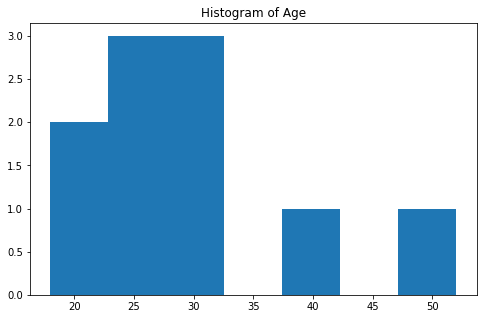

In [127]:
plt.figure(figsize=(8,5))
plt.hist(df.Age, bins=7)
plt.title('Histogram of Age');

### Extracting comments made on a particular post

In [131]:
post_id = 1

df = pd.read_sql_query("""SELECT a.FirstName, a.LastName, b.Comment FROM mydb.Comment as b
INNER JOIN mydb.User as a ON a.User_ID = b.User_User_ID WHERE b.Post_Post_ID = {};""".format(post_id),mydb)

In [132]:
df

,FirstName,LastName,Comment
0,Jake,Paul,I love it!
1,Paula,Abraham,Come back soon!
2,Tom,Cruise,Great Wi


### Extracting likes for a particular post

In [133]:
post_id = 3

df = pd.read_sql_query("""SELECT a.FirstName, a.LastName FROM mydb.Like as b
INNER JOIN mydb.User as a ON a.User_ID = b.User_User_ID WHERE b.Post_Post_ID = {};""".format(post_id),mydb)

In [134]:
df

,FirstName,LastName
0,Jake,Paul
1,Jennifer,Peralta


### Close database connection

In [15]:
cursor.close()
mydb.close()